In [1]:
import math
import os
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing

### Pile-sorting data

Read in Chinese & English raw sorting data; aggregate into a single dataframe (sorting_raw):

"Since the pile sorts correlated highly across groups (Malt et al., 1999), we aggregated pile-sorting responses from participants across the two groups, and took the similarity sim(i,j) of any two objects i and j to be the proportion of all participants who sorted those two objects into the same pile."

In [2]:
sorting_raw = pd.DataFrame()


# read in Chinese raw sorting data
for filename in os.listdir('malt_data/sorting/chinese'):  # or use participants(ps) number range() with try/except since file numbering is not consecutive prob due to data cleaning
    
    indf = pd.read_csv('malt_data/sorting/chinese/' + filename, names = ['piles'])  # each pile: space separated str
    indf['piles'] = indf.piles.apply(lambda x: [int(i) for i in x.split()])  # convert each space separated str in 'piles' into a lst of int
    
    num = re.compile(r'\d+').findall(filename)[0]
    indf['ps'] = 'c' + str(num)  # extract ps number from filename
    
    sorting_raw = sorting_raw.append(indf)

    
# same for English raw sorting data
for filename in os.listdir('malt_data/sorting/english'):  
    indf = pd.read_csv('malt_data/sorting/english/' + filename, names = ['piles'])
    indf['piles'] = indf.piles.apply(lambda x: [int(i) for i in x.split()])
    num = re.compile(r'\d+').findall(filename)[0]
    indf['ps'] = 'e' + str(num)
    sorting_raw = sorting_raw.append(indf)


# reindex to remove duplicated indices from merging multiple indf
sorting_raw = sorting_raw.reset_index(drop = True)


# pd.set_option('display.max_rows', None)  # display all rows in the dataframe
print(np.shape(sorting_raw))
# sorting_raw # sanity


(1001, 2)


Merge piles created by each participant into an outerlist

In [3]:
sorting_merged = sorting_raw.groupby('ps').agg(lambda x: tuple(x)).applymap(list).reset_index()
sorting_merged

,ps,piles
0,c1,"[[42], [23, 24, 16, 35, 22], [57, 54, 43, 58, ..."
1,c11,"[[6, 52, 1, 8, 3, 2, 29], [33, 31, 42], [56, 5..."
2,c12,"[[20], [32], [46], [21, 35, 16, 24, 23, 26, 22..."
3,c14,"[[21, 51, 55, 20, 28, 33], [25, 56, 23, 24, 47..."
4,c15,"[[32, 51], [25, 55, 56], [35, 48, 39], [59], [..."
...,...,...
85,e8,"[[44], [40, 28, 41, 49], [45], [18, 10, 11, 7,..."
86,e80,"[[10, 44, 11, 14, 9, 53], [49, 25, 55], [24, 4..."
87,e82,"[[59, 43, 54, 57, 58, 60], [20, 28, 55, 33, 51..."
88,e83,"[[29, 17], [33, 28, 50], [58, 57, 54, 43, 60],..."


### Naming data (from Malt's study and our study)

In [4]:
# English naming data from Malt's naming task (modal names without modifiers)
modal_name_naming = pd.read_csv('malt_data/naming/naming_en_modal.csv')
modal_name_naming.columns = ['obj', 'cat_en_malt']

# Chinese naming data from Malt's study
modal_name_naming['cat_ch_malt'] = pd.read_csv('malt_data/naming/naming_ch_modal.csv')['cat']

In [5]:
# English naming data from our study
modal_name_naming['cat_en_ours1'] = pd.read_csv('survey_data/naming/naming_survey_en_cat1.csv')['cat']
modal_name_naming['cat_en_ours2'] = pd.read_csv('survey_data/naming/naming_survey_en_cat2.csv')['cat']

# Chinese
modal_name_naming['cat_ch_ours'] = pd.read_csv('survey_data/naming/naming_survey_ch_cat.csv')['cat']

modal_name_naming

,obj,cat_en_malt,cat_ch_malt,cat_en_ours1,cat_en_ours2,cat_ch_ours
0,1,container,he2,container,container,he2
1,2,container,he2,canister,canister,ping2
2,3,bottle,ping2,bottle,bottle,ping2
3,4,bottle,ping2,bottle,bottle,ping2
4,5,bottle,ping2,bottle,bottle,ping2
5,6,container,ping2,container,container,ping2
6,7,jar,ping2,jar,jar,ping2
7,8,bottle,ping2,bottle,bottle,ping2
8,9,container,ping2,bottle,bottle,ping2
9,10,jar,ping2,bottle,jar,ping2


In [6]:
%store modal_name_naming

Stored 'modal_name_naming' (DataFrame)


In [7]:
modal_name_naming.to_csv("naming_all.csv")

In [8]:
# Malt English naming data freq by cat
cat_freq_en_malt = modal_name_naming.groupby('cat_en_malt').count()[['obj']]
cat_freq_en_malt.columns = ['ct']

cat_freq_en_malt

,ct
cat_en_malt,
bottle,16
box,1
can,5
container,15
jar,19
jug,3
tube,1


In [9]:
# Our English naming data freq by cat 1
cat_freq_en_ours1 = modal_name_naming.groupby('cat_en_ours1').count()[['obj']]
cat_freq_en_ours1.columns = ['ct']

cat_freq_en_ours1

,ct
cat_en_ours1,
bottle,23
box,1
can,6
canister,1
container,3
jar,18
jug,6
tub,1
tube,1


In [10]:
# Our English naming data freq by cat 2
cat_freq_en_ours2 = modal_name_naming.groupby('cat_en_ours2').count()[['obj']]
cat_freq_en_ours2.columns = ['ct']

cat_freq_en_ours2

,ct
cat_en_ours2,
bottle,22
box,1
can,6
canister,1
container,3
jar,19
jug,6
tub,1
tube,1


In [11]:
# Malt's Chinese naming data freq by cat
cat_freq_ch_malt = modal_name_naming.groupby('cat_ch_malt').count()[['obj']]
cat_freq_ch_malt.columns = ['ct']

cat_freq_ch_malt

,ct
cat_ch_malt,
guan3,1
guan4,10
he2,4
ping2,40
tong3,5


In [12]:
# Our Chinese naming data freq by cat
cat_freq_ch_ours = modal_name_naming.groupby('cat_ch_ours').count()[['obj']]
cat_freq_ch_ours.columns = ['ct']

cat_freq_ch_ours

,ct
cat_ch_ours,
guan3,1
guan4,8
he2,4
ping2,42
tong3,5


### Need probability data (from Ngram and our freq rating task)

Google Ngram

In [13]:
need_prob = pd.read_csv('ngram_data/need_prob_ae_nonlemmatized_all.csv') # non-lemmarized corpus data
# need_prob = pd.read_csv('need_prob_ae_lemmatized_all.csv') # lemmarized corpus data

need_prob

,obj,en_ngram_freq_1999_undivided,en_ngram_freq_1999_divided,en_ngram_freq_2019_undivided
0,1,6.400000e-06,6.400000e-06,7.084100e-06
1,2,7.110000e-07,7.110000e-07,2.965000e-07
2,3,1.390000e-08,1.390000e-08,6.930000e-08
3,4,5.690000e-07,5.690000e-07,2.600000e-07
4,5,3.650000e-06,3.650000e-06,3.206800e-06
5,6,2.650000e-05,2.940000e-06,2.693620e-05
6,7,2.860000e-05,3.170000e-06,4.263660e-05
7,8,2.110000e-07,2.110000e-07,2.471000e-07
8,9,2.650000e-05,2.940000e-06,2.693620e-05
9,10,4.740000e-07,4.740000e-07,5.931000e-07


In [14]:
# normalizing need_prob['en']:
total_en_1999_undivided = sum(need_prob['en_ngram_freq_1999_undivided'])
need_prob['en_ngram_1999_undivided'] = need_prob['en_ngram_freq_1999_undivided'].apply(lambda x: x / total_en_1999_undivided)

total_en_1999_divided = sum(need_prob['en_ngram_freq_1999_divided'])
need_prob['en_ngram_1999_divided'] = need_prob['en_ngram_freq_1999_divided'].apply(lambda x: x / total_en_1999_divided)

total_en_2019_undivided = sum(need_prob['en_ngram_freq_2019_undivided'])
need_prob['en_ngram_2019_undivided'] = need_prob['en_ngram_freq_2019_undivided'].apply(lambda x: x / total_en_2019_undivided)

# total_en_2019_divided = sum(need_prob['en_ngram_freq_2019_divided'])
# need_prob['en_ngram_2019_divided'] = need_prob['en_ngram_freq_2019_divided'].apply(lambda x: x / total_en_2019_divided)

need_prob

,obj,en_ngram_freq_1999_undivided,en_ngram_freq_1999_divided,en_ngram_freq_2019_undivided,en_ngram_1999_undivided,en_ngram_1999_divided,en_ngram_2019_undivided
0,1,6.400000e-06,6.400000e-06,7.084100e-06,0.009413,0.038558,0.008578
1,2,7.110000e-07,7.110000e-07,2.965000e-07,0.001046,0.004284,0.000359
2,3,1.390000e-08,1.390000e-08,6.930000e-08,0.000020,0.000084,0.000084
3,4,5.690000e-07,5.690000e-07,2.600000e-07,0.000837,0.003428,0.000315
4,5,3.650000e-06,3.650000e-06,3.206800e-06,0.005368,0.021990,0.003883
5,6,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615
6,7,2.860000e-05,3.170000e-06,4.263660e-05,0.042062,0.019098,0.051626
7,8,2.110000e-07,2.110000e-07,2.471000e-07,0.000310,0.001271,0.000299
8,9,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615
9,10,4.740000e-07,4.740000e-07,5.931000e-07,0.000697,0.002856,0.000718


Our survey's freq rating task

In [15]:
# %store -r need_prob_rating_en
%store -r need_prob_rating_en_excluded
# %store -r need_prob_rating_ch
%store -r need_prob_rating_ch_excluded

In [16]:
# use normalized data:
need_prob['en_survey_nontrans'] = need_prob_rating_en_excluded[["need_prob"]]
need_prob['ch_survey_nontrans'] = need_prob_rating_ch_excluded[["need_prob"]]

need_prob

,obj,en_ngram_freq_1999_undivided,en_ngram_freq_1999_divided,en_ngram_freq_2019_undivided,en_ngram_1999_undivided,en_ngram_1999_divided,en_ngram_2019_undivided,en_survey_nontrans,ch_survey_nontrans
0,1,6.400000e-06,6.400000e-06,7.084100e-06,0.009413,0.038558,0.008578,0.014089,0.017703
1,2,7.110000e-07,7.110000e-07,2.965000e-07,0.001046,0.004284,0.000359,0.007749,0.013206
2,3,1.390000e-08,1.390000e-08,6.930000e-08,0.000020,0.000084,0.000084,0.016555,0.017703
3,4,5.690000e-07,5.690000e-07,2.600000e-07,0.000837,0.003428,0.000315,0.017964,0.015303
4,5,3.650000e-06,3.650000e-06,3.206800e-06,0.005368,0.021990,0.003883,0.020782,0.018903
5,6,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.018669,0.013206
6,7,2.860000e-05,3.170000e-06,4.263660e-05,0.042062,0.019098,0.051626,0.018316,0.015909
7,8,2.110000e-07,2.110000e-07,2.471000e-07,0.000310,0.001271,0.000299,0.015851,0.013503
8,9,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.021839,0.015006
9,10,4.740000e-07,4.740000e-07,5.931000e-07,0.000697,0.002856,0.000718,0.018669,0.013503


In [17]:
# add non-normalized data for data-driven approach:
need_prob['en_survey_raw'] = need_prob_rating_en_excluded[["mean"]]
need_prob['ch_survey_raw'] = need_prob_rating_ch_excluded[["mean"]]
need_prob['en_ch_survey_raw'] = need_prob['en_survey_raw'] - need_prob['ch_survey_raw']

need_prob

,obj,en_ngram_freq_1999_undivided,en_ngram_freq_1999_divided,en_ngram_freq_2019_undivided,en_ngram_1999_undivided,en_ngram_1999_divided,en_ngram_2019_undivided,en_survey_nontrans,ch_survey_nontrans,en_survey_raw,ch_survey_raw,en_ch_survey_raw
0,1,6.400000e-06,6.400000e-06,7.084100e-06,0.009413,0.038558,0.008578,0.014089,0.017703,2.5000,2.564453,-0.064453
1,2,7.110000e-07,7.110000e-07,2.965000e-07,0.001046,0.004284,0.000359,0.007749,0.013206,1.3750,1.913086,-0.538086
2,3,1.390000e-08,1.390000e-08,6.930000e-08,0.000020,0.000084,0.000084,0.016555,0.017703,2.9375,2.564453,0.373047
3,4,5.690000e-07,5.690000e-07,2.600000e-07,0.000837,0.003428,0.000315,0.017964,0.015303,3.1875,2.216797,0.970703
4,5,3.650000e-06,3.650000e-06,3.206800e-06,0.005368,0.021990,0.003883,0.020782,0.018903,3.6875,2.738281,0.949219
5,6,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.018669,0.013206,3.3125,1.913086,1.399414
6,7,2.860000e-05,3.170000e-06,4.263660e-05,0.042062,0.019098,0.051626,0.018316,0.015909,3.2500,2.304688,0.945312
7,8,2.110000e-07,2.110000e-07,2.471000e-07,0.000310,0.001271,0.000299,0.015851,0.013503,2.8125,1.956055,0.856445
8,9,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.021839,0.015006,3.8750,2.173828,1.701172
9,10,4.740000e-07,4.740000e-07,5.931000e-07,0.000697,0.002856,0.000718,0.018669,0.013503,3.3125,1.956055,1.356445


In [18]:
# zipf need
need_prob['en_zipf'] = pd.read_csv('survey_data/need_prob/need_prob_zipf.csv')[['en']]
need_prob['ch_zipf'] = pd.read_csv('survey_data/need_prob/need_prob_zipf.csv')[['ch']]
need_prob

,obj,en_ngram_freq_1999_undivided,en_ngram_freq_1999_divided,en_ngram_freq_2019_undivided,en_ngram_1999_undivided,en_ngram_1999_divided,en_ngram_2019_undivided,en_survey_nontrans,ch_survey_nontrans,en_survey_raw,ch_survey_raw,en_ch_survey_raw,en_zipf,ch_zipf
0,1,6.400000e-06,6.400000e-06,7.084100e-06,0.009413,0.038558,0.008578,0.014089,0.017703,2.5000,2.564453,-0.064453,0.005630,0.012686
1,2,7.110000e-07,7.110000e-07,2.965000e-07,0.001046,0.004284,0.000359,0.007749,0.013206,1.3750,1.913086,-0.538086,0.004047,0.005766
2,3,1.390000e-08,1.390000e-08,6.930000e-08,0.000020,0.000084,0.000084,0.016555,0.017703,2.9375,2.564453,0.373047,0.007194,0.012686
3,4,5.690000e-07,5.690000e-07,2.600000e-07,0.000837,0.003428,0.000315,0.017964,0.015303,3.1875,2.216797,0.970703,0.009250,0.007462
4,5,3.650000e-06,3.650000e-06,3.206800e-06,0.005368,0.021990,0.003883,0.020782,0.018903,3.6875,2.738281,0.949219,0.021583,0.021144
5,6,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.018669,0.013206,3.3125,1.913086,1.399414,0.010791,0.005766
6,7,2.860000e-05,3.170000e-06,4.263660e-05,0.042062,0.019098,0.051626,0.018316,0.015909,3.2500,2.304688,0.945312,0.009961,0.008457
7,8,2.110000e-07,2.110000e-07,2.471000e-07,0.000310,0.001271,0.000299,0.015851,0.013503,2.8125,1.956055,0.856445,0.006475,0.006041
8,9,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.021839,0.015006,3.8750,2.173828,1.701172,0.043166,0.007048
9,10,4.740000e-07,4.740000e-07,5.931000e-07,0.000697,0.002856,0.000718,0.018669,0.013503,3.3125,1.956055,1.356445,0.010791,0.006041


In [19]:
# add ranking
need_prob["en_survey_raw_sort"] = need_prob_rating_en_excluded['rank']
need_prob["ch_survey_raw_sort"] = need_prob_rating_ch_excluded['rank']
need_prob

,obj,en_ngram_freq_1999_undivided,en_ngram_freq_1999_divided,en_ngram_freq_2019_undivided,en_ngram_1999_undivided,en_ngram_1999_divided,en_ngram_2019_undivided,en_survey_nontrans,ch_survey_nontrans,en_survey_raw,ch_survey_raw,en_ch_survey_raw,en_zipf,ch_zipf,en_survey_raw_sort,ch_survey_raw_sort
0,1,6.400000e-06,6.400000e-06,7.084100e-06,0.009413,0.038558,0.008578,0.014089,0.017703,2.5000,2.564453,-0.064453,0.005630,0.012686,23.0,10.0
1,2,7.110000e-07,7.110000e-07,2.965000e-07,0.001046,0.004284,0.000359,0.007749,0.013206,1.3750,1.913086,-0.538086,0.004047,0.005766,32.0,22.0
2,3,1.390000e-08,1.390000e-08,6.930000e-08,0.000020,0.000084,0.000084,0.016555,0.017703,2.9375,2.564453,0.373047,0.007194,0.012686,18.0,10.0
3,4,5.690000e-07,5.690000e-07,2.600000e-07,0.000837,0.003428,0.000315,0.017964,0.015303,3.1875,2.216797,0.970703,0.009250,0.007462,14.0,17.0
4,5,3.650000e-06,3.650000e-06,3.206800e-06,0.005368,0.021990,0.003883,0.020782,0.018903,3.6875,2.738281,0.949219,0.021583,0.021144,6.0,6.0
5,6,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.018669,0.013206,3.3125,1.913086,1.399414,0.010791,0.005766,12.0,22.0
6,7,2.860000e-05,3.170000e-06,4.263660e-05,0.042062,0.019098,0.051626,0.018316,0.015909,3.2500,2.304688,0.945312,0.009961,0.008457,13.0,15.0
7,8,2.110000e-07,2.110000e-07,2.471000e-07,0.000310,0.001271,0.000299,0.015851,0.013503,2.8125,1.956055,0.856445,0.006475,0.006041,20.0,21.0
8,9,2.650000e-05,2.940000e-06,2.693620e-05,0.038974,0.017712,0.032615,0.021839,0.015006,3.8750,2.173828,1.701172,0.043166,0.007048,3.0,18.0
9,10,4.740000e-07,4.740000e-07,5.931000e-07,0.000697,0.002856,0.000718,0.018669,0.013503,3.3125,1.956055,1.356445,0.010791,0.006041,12.0,21.0


In [20]:
%store need_prob

Stored 'need_prob' (DataFrame)


In [23]:
# need_prob.sort_values('en_ch_survey_raw').to_csv("need_prob_all.csv")
need_prob.to_csv("need_prob_all.csv")

# Need Prob Analysis

In [25]:
%store -r need_prob
%store -r modal_name_naming

### Corpus vs subjective estimates

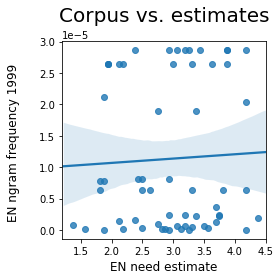

In [26]:
# ngram need prob freq (1999 non-lemmatized undivided) vs our EN need ratings non-transformed (both not normalized)

import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.regplot(x = need_prob["en_survey_raw"], y = need_prob["en_ngram_freq_1999_undivided"], truncate=False)

ax.set_xlabel("EN need estimate", fontsize=12)
ax.set_ylabel("EN ngram frequency 1999 \n", fontsize=12)  
ax.set_title("Corpus vs. estimates", fontsize=20, pad=20)
plt.xlim([1.2, 4.5])
plt.xticks(np.arange(1.5, 4.6, 0.5))

plt.tight_layout()
# plt.savefig('need_corpus_vs_survey.pdf', bbox_inches = 'tight')

In [28]:
# ngram vs en survey regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = need_prob["en_survey_raw"].values.reshape((-1, 1))
y = need_prob["en_ngram_freq_1999_undivided"]
reg = LinearRegression().fit(X, y)

In [29]:
# coefficients
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)

intercept: 9.290425e-06
slope: [6.8800693e-07]


In [32]:
# another way of getting linear regression results 

import statsmodels.api as sm

X = need_prob["en_survey_raw"].values.reshape((-1, 1))
y = need_prob["en_ngram_freq_1999_undivided"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                 
Dep. Variable:     en_ngram_freq_1999_undivided   R-squared:                       0.002
Model:                                      OLS   Adj. R-squared:                 -0.015
Method:                           Least Squares   F-statistic:                    0.1154
Date:                          Sat, 04 Jun 2022   Prob (F-statistic):              0.735
Time:                                  19:03:09   Log-Likelihood:                 596.45
No. Observations:                            60   AIC:                            -1189.
Df Residuals:                                58   BIC:                            -1185.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### EN Corpus 2019 vs 1999

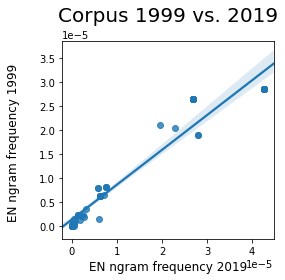

In [35]:
# EN ngram need prob freq 1999 vs 2019 without transform (both not normalized)

import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.regplot(x = need_prob["en_ngram_freq_2019_undivided"], y = need_prob["en_ngram_freq_1999_undivided"], truncate=False)

ax.set_xlabel("EN ngram frequency 2019", fontsize=12)
ax.set_ylabel("EN ngram frequency 1999 \n", fontsize=12)  
ax.set_title("Corpus 1999 vs. 2019", fontsize=20, pad=20)

plt.tight_layout()
# plt.savefig('need_corpus_1999_vs_2019.pdf', bbox_inches = 'tight')

In [36]:
# linear regression

X = need_prob["en_ngram_freq_2019_undivided"].values.reshape((-1, 1))
# print(X)
y = need_prob["en_ngram_freq_1999_undivided"]
# print(y)
X = sm.add_constant(X)
# print(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


# save output as txt
with open('summary_EN_nonlemmatized_1999_2019.txt', 'w') as fh:
    fh.write(results.summary().as_text())

                                 OLS Regression Results                                 
Dep. Variable:     en_ngram_freq_1999_undivided   R-squared:                       0.936
Model:                                      OLS   Adj. R-squared:                  0.935
Method:                           Least Squares   F-statistic:                     850.2
Date:                          Sat, 04 Jun 2022   Prob (F-statistic):           2.43e-36
Time:                                  19:09:10   Log-Likelihood:                 678.92
No. Observations:                            60   AIC:                            -1354.
Df Residuals:                                58   BIC:                            -1350.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### Subjective estimates CH vs EN

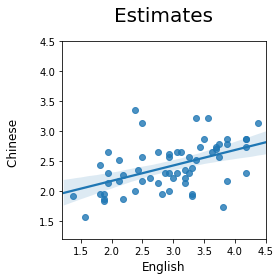

In [38]:
# raw (non-normalized, non-transformed) EN vs CH need ratings from our study

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.regplot(x = need_prob["en_survey_raw"], y = need_prob["ch_survey_raw"], truncate=False)
# plt.plot([0, 4.5], [0, 4.5], color="black", linewidth=0.5)

ax.set_xlabel("English", fontsize=12)
ax.set_ylabel("Chinese \n", fontsize=12)  
ax.set_title("Estimates", fontsize=20, pad=20)
plt.xlim([1.2, 4.5])
plt.ylim([1.2, 4.5])
plt.xticks(np.arange(1.5, 4.6, 0.5))

plt.tight_layout()
# plt.savefig('need_ENraw_vs_CHraw.pdf', bbox_inches = 'tight')

In [39]:
# get linear regression results

X = need_prob["en_survey_raw"].values.reshape((-1, 1))
y = need_prob["ch_survey_raw"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          ch_survey_raw   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     18.17
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           7.53e-05
Time:                        19:10:33   Log-Likelihood:                -21.836
No. Observations:                  60   AIC:                             47.67
Df Residuals:                      58   BIC:                             51.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6506      0.185      8.927      0.0

### EN subjective estimates sorted

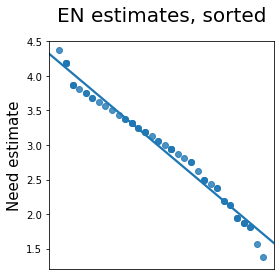

In [27]:
# EN raw rating sorted

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.regplot(x = need_prob["en_survey_raw_sort"], y = need_prob["en_survey_raw"], truncate=False, ci=None)

ax.set_ylabel("Need estimate", fontsize=15)  
ax.set_title("EN estimates, sorted", fontsize=20, pad=20)
ax.xaxis.set_ticks([])
# ax.set_xlabel("English", fontsize=15)
ax.set_xlabel("")
plt.ylim([1.2, 4.5])

plt.tight_layout()
# plt.savefig('need_survey_sorted_EN.pdf', bbox_inches = 'tight')

### CH subjective estimates sorted

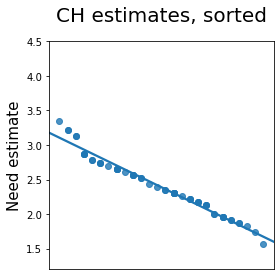

In [28]:
# CH raw rating sorted

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.regplot(x = need_prob["ch_survey_raw_sort"], y = need_prob["ch_survey_raw"], truncate=False, ci=None)

ax.set_ylabel("Need estimate", fontsize=15)  
ax.set_title("CH estimates, sorted", fontsize=20, pad=20)
ax.xaxis.set_ticks([])
# ax.set_xlabel("Chinese", fontsize=15)
ax.set_xlabel("")
plt.ylim([1.2, 4.5])

plt.tight_layout()
# plt.savefig('need_survey_sorted_CH.pdf', bbox_inches = 'tight')

### Zipf CH vs EN

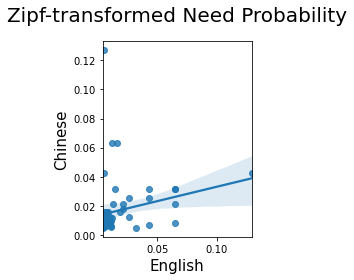

In [46]:
# transformed and normalized EN vs CH need ratings from our study

fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.regplot(x = need_prob["en_zipf"], y = need_prob["ch_zipf"])

ax.set_xlabel("English", fontsize=15)
ax.set_ylabel("Chinese", fontsize=15)  
ax.set_title("Zipf-transformed Need Probability", fontsize=20, pad=20)

plt.tight_layout()
# plt.savefig('need_ENzipf_vs_CHzipf.pdf', bbox_inches = 'tight')

# Similarity Space

"Since the pile sorts correlated highly across groups (Malt et al., 1999), we aggregated pile-sorting responses from participants across the two groups, and took the similarity sim(i,j) of any two objects i and j to be the proportion of all participants who sorted those two objects into the same pile."

In [47]:
# function for finding outerlist index given an element in an innerlist of the outerlist
def find_outerlst_index(elm, outerlst):
    for innerlst in outerlst:
        if elm in innerlst:
            return outerlst.index(innerlst)

# [find_outerlst_index(1, piles) for piles in sorting_merged['piles']]  # sanity check

In [48]:
# similarity space based on sorting results
sim = {}  # key: tuple (i, j); value: similarity score
num_ps = len(sorting_merged.index)  # total number of participants in the sorting task

for i in range(1, 61):
    for j in range (1, 61):
        num_samepile = 0
        for piles in sorting_merged['piles']:
            if find_outerlst_index(i, piles) == find_outerlst_index(j, piles):
                num_samepile += 1
        sim[(i, j)] = num_samepile / num_ps

# len(sim)  # sanity check
# sim

In [49]:
# # sanity: print sim
# for i in sim:
#     print(i, sim[i])

In [50]:
# %store sim

# Simulated Chaining in Similarity Space

### Yang's Approach
start with all exemplars unallocated to categories.  
repeat until all exemplars allocated:
- probabilistically select a cat C to either start or expand, where the probability of a cat being selected is proportional to the number of remaining unallocated exemplars it has.
- start or expand C as follows:
    - if you have not yet allocated any exemplars to C:
        - randomly pick an unallocated exemplar and label it C.
    - else (i.e. you do already have one or more exemplars allocated to C, and we will need to chain from them):
        - choose an exemplar E from C [Yang's approach: this will be the exemplar that is closest to some non-allocated exemplar]
        - chain from E, as follows:
            - select a new exemplar by sampling as-yet-unallocated exemplars in proportion to their similarity with E.
            - label that new exemplar with label C

In [51]:
##### add columns orig, orig_sq, sq to naming_en_lsdf to track chaining sequence #####

def chaining_yang(sim, cat_freq_df):
    
    # creating and pre-populating a 5-column df (columns = ['obj', 'name', 'cat', 'orig', 'orig_sq', 'sq']):
    d = {'obj': [i for i in range(1, 60 + 1)], 'cat': ['NA' for i in range(60)], 'orig': [0 for i in range(60)], 'orig_sq': [0 for i in range(60)], 'sq': [0 for i in range(60)]}
    naming_lsdf = pd.DataFrame(data = d)    
    
    
    cat_tracker = cat_freq_df.copy()  # tracking remaining capacity of each cat
    remaining_lsdf = naming_lsdf[naming_lsdf['cat'] == 'NA']  # tracking unassigned exemplars
    
    while 'NA' in naming_lsdf['cat'].tolist():
        
        # probabilistically select a cat exp_cat to either start or expand:
        p_cat_ratio = np.array(cat_tracker.ct.tolist())  # convert lst of raw prob to array
        p_cat = p_cat_ratio / p_cat_ratio.sum()  # normalize. otherwise "probability does not sum to 1" error with np.random.choice
        exp_cat = np.random.choice(cat_tracker.index, p = p_cat)  # the cat to be expanded
        
        # start expanding:
        if exp_cat not in naming_lsdf['cat'].tolist():  # if not yet allocated any exemplars to exp_cat
            ex = np.random.choice(remaining_lsdf['obj'])  # randomly pick an unallocated exemplar ex and label it exp_cat
            naming_lsdf.at[naming_lsdf[naming_lsdf.obj == ex].index[0], 'cat'] = exp_cat  # assign cat
            naming_lsdf.at[naming_lsdf[naming_lsdf.obj == ex].index[0], 'sq'] = 1 # mark sequence of cat assignment
        else:
            same_cat_all = naming_lsdf[naming_lsdf.cat == exp_cat].obj.tolist()  # list of allocated exp in exp_cat
            # choose the exemplar in exp_cat that is closest to some non-allocated exemplar to expand from:
            max_sim = 0  # for tracking the max similarity between allocated exemplar and non-allocated exemplar
            init_ex = []  # for tracking selected exemplar(s) to expand from
            for i in same_cat_all:
                i_max_sim = max([sim[(i, j)] for j in remaining_lsdf['obj'].tolist()])  # allocated exemplar i's max similarity to some non-allocated exemplar
                if i_max_sim > max_sim:
                    max_sim = i_max_sim
                    init_ex = [i]
                if i_max_sim == max_sim: 
                    init_ex.append(i)
            init_ex = np.random.choice(init_ex)  # the chosen exemplar to expand from
            sq_last = naming_lsdf[naming_lsdf.obj == init_ex].sq.item()
            # select a new exemplar by sampling as-yet-unallocated exemplars in proportion to their similarity with init_ex. label that new exemplar exp_cat: 
            p_ratio = [sim[(init_ex, j)] for j in remaining_lsdf['obj'].tolist()]
            p_ratio = np.array(p_ratio)  # convert lst to array
#             display(p_ratio)  # sanity check for debugging
            p = p_ratio / p_ratio.sum() if p_ratio.sum() != 0 else np.array([0]) # normalize. otherwise "probability does not sum to 1" error with np.random.choice
################# attention: this part used to produce error occasionally due to 0 in denominator (fixed) ################          
            if not np.array_equal(p, np.array([0])):  # check if p equals to np.array([0]). `if p != [0]` does not work: `The truth value of an array with more than one element is ambiguous`
                exp_ex = np.random.choice(remaining_lsdf['obj'], p = p)  # pick an exemplar to assign the exp_cat label
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'cat'] = exp_cat
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'orig'] = init_ex
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'orig_sq'] = sq_last
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'sq'] = sq_last + 1
            else:
                exp_ex = np.random.choice(remaining_lsdf['obj'])  # pick an exemplar to assign the exp_cat label
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'cat'] = exp_cat
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'orig'] = init_ex
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'orig_sq'] = sq_last
                naming_lsdf.at[naming_lsdf[naming_lsdf.obj == exp_ex].index[0], 'sq'] = sq_last + 1
##################       
        cat_tracker.at[exp_cat, 'ct'] -= 1  # update cat tracker
        remaining_lsdf = naming_lsdf[naming_lsdf['cat'] == 'NA']  # tracking unassigned exemplars
 
    
    return naming_lsdf


In [52]:
# test
naming_en_ysdf1 = chaining_yang(sim, cat_freq_en_malt)
naming_en_ysdf1

,obj,cat,orig,orig_sq,sq
0,1,bottle,23,2,3
1,2,bottle,1,3,4
2,3,jar,57,2,3
3,4,container,10,3,4
4,5,container,4,4,5
5,6,jug,0,0,1
6,7,bottle,31,5,6
7,8,bottle,31,5,6
8,9,jar,18,4,5
9,10,container,30,2,3


# nMDS of Similarity Space

In [53]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html?highlight=multidimensional%20scaling
from sklearn.manifold import MDS


# generate and pre-populate a 60*60 np 2d array
simtrx = np.zeros(3600).reshape((60, 60))
# similarity matrix
for i in range(60):
    for j in range(60):
        simtrx[i, j] = sim[(i+1, j+1)]

# transform similarity matrix to distance matrix
converter = lambda x: 1 - x
vfunc = np.vectorize(converter)
dismtrx = vfunc(simtrx)

# get coordinates of the 60 objs through MDS
mds = MDS(n_components=2, metric=True, n_init=50, max_iter=300, eps=0.001, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dismtrx).embedding_
nmds = MDS(n_components=2, metric=False, n_init=1, max_iter=1000, eps=0.001, dissimilarity="precomputed", n_jobs=1)
npos = nmds.fit_transform(dismtrx, init=pos)


### Naming EN vs CH

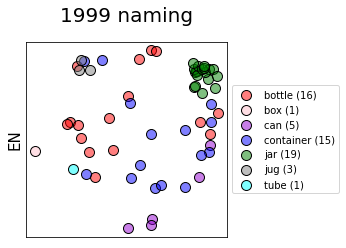

In [54]:
from matplotlib import colors as mcolors

cdict = {"bottle": 'red', "container": 'blue', "jug": "gray", "can": "darkviolet", "jar": "green", "box": "pink", "tube": "cyan",
        "canister": "gold", "tub": "orange",
        "ping2": "red", "tong3": "gray", "guan4": "darkviolet", "he2": "pink", "guan3": "cyan"}

fig, ax = plt.subplots(figsize=(6,6))

# plot EN 1999
for cat in np.unique(modal_name_naming["cat_en_malt"]):
    ix = np.where(modal_name_naming["cat_en_malt"]==cat)
    ax.scatter(npos[:, 0][ix], npos[:, 1][ix], fc=mcolors.to_rgba(cdict[cat],0.5), ec=mcolors.to_rgba("black",1), label=cat, s = 100)
ax.set_title('1999 naming', fontsize=20, pad=20)
ax.set_ylabel('EN', fontsize=15)

# Shrink current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height * 0.6])
# Put a legend to the right of the current axis, and manually set legend texts
ax.legend(["bottle (16)", "box (1)", "can (5)", "container (15)", "jar (19)", "jug (3)", "tube (1)"], loc='center left', bbox_to_anchor=(1, 0.5))

# remove axis ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# plt.savefig('nmds_EN_1999.pdf', bbox_inches = 'tight')
plt.show()


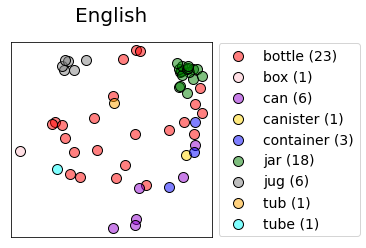

In [56]:
from matplotlib import colors as mcolors

cdict = {"bottle": 'red', "container": 'blue', "jug": "gray", "can": "darkviolet", "jar": "green", "box": "pink", "tube": "cyan",
        "canister": "gold", "tub": "orange",
        "ping2": "red", "tong3": "gray", "guan4": "darkviolet", "he2": "pink", "guan3": "cyan"}

fig, ax = plt.subplots(figsize=(6,6))

# plot EN 2021
for cat in np.unique(modal_name_naming["cat_en_ours1"]):
    ix = np.where(modal_name_naming["cat_en_ours1"]==cat)
    ax.scatter(npos[:, 0][ix], npos[:, 1][ix], fc=mcolors.to_rgba(cdict[cat],0.5), ec=mcolors.to_rgba("black",1), label=cat, s = 100)
ax.set_title('English', fontsize=20, pad=20)
# ax.set_ylabel('EN', fontsize=15)

# Shrink current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height * 0.6])
# Put a legend to the right of the current axis, and manually set legend texts
ax.legend(["bottle (23)", "box (1)", "can (6)", "canister (1)", "container (3)", "jar (18)", "jug (6)", "tub (1)", "tube (1)"], loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# remove axis ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# plt.savefig('nmds_EN_2021.pdf', bbox_inches = 'tight')
plt.show()


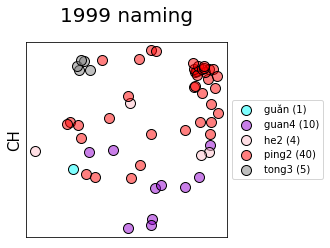

In [58]:
from matplotlib import colors as mcolors

cdict = {"bottle": 'red', "container": 'blue', "jug": "gray", "can": "darkviolet", "jar": "green", "box": "pink", "tube": "cyan",
        "canister": "gold", "tub": "orange",
        "ping2": "red", "tong3": "gray", "guan4": "darkviolet", "he2": "pink", "guan3": "cyan"}

fig, ax = plt.subplots(figsize=(6,6))

# plot CH 1999
for cat in np.unique(modal_name_naming["cat_ch_malt"]):
    ix = np.where(modal_name_naming["cat_ch_malt"]==cat)
    ax.scatter(npos[:, 0][ix], npos[:, 1][ix], fc=mcolors.to_rgba(cdict[cat],0.5), ec=mcolors.to_rgba("black",1), label=cat, s = 100)
ax.set_title('1999 naming', fontsize=20, pad=20)
ax.set_ylabel('CH', fontsize=15)

# Shrink current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height * 0.6])
# Put a legend to the right of the current axis, and manually set legend texts
ax.legend(["guǎn (1)", "guan4 (10)", "he2 (4)", "ping2 (40)", "tong3 (5)"], loc='center left', bbox_to_anchor=(1, 0.5))

# remove axis ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# plt.savefig('nmds_CH_1999.pdf', bbox_inches = 'tight')
plt.show()


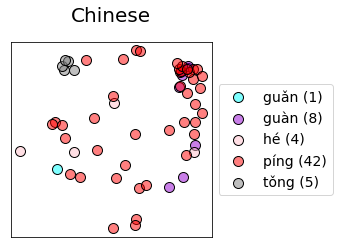

In [57]:
from matplotlib import colors as mcolors

cdict = {"bottle": 'red', "container": 'blue', "jug": "gray", "can": "darkviolet", "jar": "green", "box": "pink", "tube": "cyan",
        "canister": "gold", "tub": "orange",
        "ping2": "red", "tong3": "gray", "guan4": "darkviolet", "he2": "pink", "guan3": "cyan"}

fig, ax = plt.subplots(figsize=(6,6))

# plot CH 2021
for cat in np.unique(modal_name_naming["cat_ch_ours"]):
    ix = np.where(modal_name_naming["cat_ch_ours"]==cat)
    ax.scatter(npos[:, 0][ix], npos[:, 1][ix], fc=mcolors.to_rgba(cdict[cat],0.5), ec=mcolors.to_rgba("black",1), label=cat, s = 100)
ax.set_title('Chinese', fontsize=20, pad=20)
# ax.set_ylabel('CH', fontsize=15)

# Shrink current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height * 0.6])
# Put a legend to the right of the current axis, and manually set legend texts
ax.legend(["guǎn (1)", "guàn (8)", "hé (4)", "píng (42)", "tǒng (5)"], loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# remove axis ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# plt.savefig('nmds_CH_2021.pdf', bbox_inches = 'tight')
plt.show()


# Communicative Cost Calculation

listener distribution > unit communicative cost of target object i > overall communicative cost in the domain

In [59]:
def create_listener_distribs(naming_df, cattype, sim):  #returns a dict of dicts: ldis[cat][obj], s.t. list[cat] is the listener distrib for cat, over objects.
    ldis = {}  # dict to hold listener distribs
    all_cats = sorted(naming_df[cattype].unique())
    all_objs = sorted(naming_df.obj.unique())
    for c in all_cats:
        objs_in_cat = naming_df[naming_df[cattype]==c].obj.values
        # create initially non-normalized listener distrib for this cat
        ldis[c] = {}
        denom = 0
        for i in all_objs:
            ldis[c][i] = sum([sim[(i,j)] for j in objs_in_cat])
            denom += ldis[c][i]
        # normalize
        ldis[c] = {k:v/denom for k,v in ldis[c].items()}
    return(ldis)

In [60]:
def add_ldis_ucc_cost(naming_df, cattype, ldis, need_prob, lg):

    # add listener distribution ('ldis') and unit communicative cost ('ucc') to naming_df for each obj
    for i in range(1, len(naming_df)+1):  # i: obj
        cat_i = naming_df[naming_df.obj==i][cattype].values[0]
        ldis_i = ldis[cat_i][i]
        naming_df.at[i-1, cattype+'_ldis'] = ldis_i
        naming_df.at[i-1, cattype+'_ucc'] = math.log((1 / ldis_i), 2)
    
    # overall communicative cost
    return np.sum([naming_df[naming_df['obj'] == obj][cattype+'_ucc'].values[0]
                   * need_prob[need_prob['obj'] == obj][lg].values[0] 
                   for obj in naming_df['obj']])

### Replicating Fig 2B for Sanity Check

indexing the 8 objects: index(coordinates)  
1(0,1) 2(1,1) 3(2,1) 4(3,1)   
5(0,0) 6(1,0) 7(2,0) 8(3,0)  

In [66]:
# set up indices of the 8 objects
matrix_coord = {
    1:(0,1), 2:(1,1), 3:(2,1), 4:(3,1),
    5:(0,0), 6:(1,0), 7:(2,0), 8:(3,0)
}

In [67]:
# set up similarity space of the 8 objects
sim_matrix = {}
for i in range(1,9):
    for j in range(1,9):
        sim_matrix[(i,j)] = math.exp(-np.linalg.norm(np.asarray(matrix_coord[i]) - np.asarray(matrix_coord[j])))   # sim(i,j) = exp(-distance(i,j))

# sim_matrix

In [68]:
# set up need_prob df with uniform need prob distribution of the 8 objects
d = {'obj': list(range(1,9)), 'matrix': [1/8]*8}
need_prob_matrix = pd.DataFrame(data=d)
# need_prob_matrix

In [69]:
# set up "naming" df for the two types of partitions in Fig 2A
d = {'obj': list(range(1,9)), 'matrix_nonchained': ['A','A','B','B','A','A','B','B'], 'matrix_chained': ['A','A','A','A','B','B','B','B']}
naming_matrix = pd.DataFrame(data=d)
naming_matrix

,obj,matrix_nonchained,matrix_chained
0,1,A,A
1,2,A,A
2,3,B,A
3,4,B,A
4,5,A,B
5,6,A,B
6,7,B,B
7,8,B,B


In [70]:
# cost for non-chained partition
l = create_listener_distribs(naming_matrix, "matrix_nonchained", sim_matrix)
cc_matrix_nonchained = add_ldis_ucc_cost(naming_matrix, "matrix_nonchained", l, need_prob_matrix, 'matrix')
cc_matrix_nonchained

2.378571491232675

In [71]:
# cost for chained partition
l = create_listener_distribs(naming_matrix, "matrix_chained", sim_matrix)
cc_matrix_chained = add_ldis_ucc_cost(naming_matrix, "matrix_chained", l, need_prob_matrix, 'matrix')
cc_matrix_chained

2.593781594479587

All possible partitions

In [72]:
# all possible partitions of 8 objects into two groups of 4
from more_itertools import set_partitions
partitions = [x for x in set_partitions(list(range(1,9)), 2) if len(x[0])==4]  # Yield the set partitions of [1, 2, 3, 4, 5, 6, 7, 8] into 2 parts (Set partitions are not order-preserving); and keep only the partitions into two groups of 4.
partitions
#len(partitions)  # sanity

[[[1, 2, 3, 4], [5, 6, 7, 8]],
 [[2, 3, 4, 5], [1, 6, 7, 8]],
 [[1, 3, 4, 5], [2, 6, 7, 8]],
 [[1, 2, 4, 5], [3, 6, 7, 8]],
 [[1, 2, 3, 5], [4, 6, 7, 8]],
 [[3, 4, 5, 6], [1, 2, 7, 8]],
 [[2, 4, 5, 6], [1, 3, 7, 8]],
 [[1, 4, 5, 6], [2, 3, 7, 8]],
 [[2, 3, 5, 6], [1, 4, 7, 8]],
 [[1, 3, 5, 6], [2, 4, 7, 8]],
 [[1, 2, 5, 6], [3, 4, 7, 8]],
 [[2, 3, 4, 6], [1, 5, 7, 8]],
 [[1, 3, 4, 6], [2, 5, 7, 8]],
 [[1, 2, 4, 6], [3, 5, 7, 8]],
 [[1, 2, 3, 6], [4, 5, 7, 8]],
 [[4, 5, 6, 7], [1, 2, 3, 8]],
 [[3, 5, 6, 7], [1, 2, 4, 8]],
 [[2, 5, 6, 7], [1, 3, 4, 8]],
 [[1, 5, 6, 7], [2, 3, 4, 8]],
 [[3, 4, 6, 7], [1, 2, 5, 8]],
 [[2, 4, 6, 7], [1, 3, 5, 8]],
 [[1, 4, 6, 7], [2, 3, 5, 8]],
 [[2, 3, 6, 7], [1, 4, 5, 8]],
 [[1, 3, 6, 7], [2, 4, 5, 8]],
 [[1, 2, 6, 7], [3, 4, 5, 8]],
 [[3, 4, 5, 7], [1, 2, 6, 8]],
 [[2, 4, 5, 7], [1, 3, 6, 8]],
 [[1, 4, 5, 7], [2, 3, 6, 8]],
 [[2, 3, 5, 7], [1, 4, 6, 8]],
 [[1, 3, 5, 7], [2, 4, 6, 8]],
 [[1, 2, 5, 7], [3, 4, 6, 8]],
 [[2, 3, 4, 7], [1, 5, 6, 8]],
 [[1, 3,

In [73]:
# calculate the communicative costs of all possible partitions

cc_matrix_all = []

d = {'obj': list(range(1,9))}
naming_matrix_iter = pd.DataFrame(data=d)

for partition in partitions:
    # assign cat A or B to the 8 objects according to the current way of partition:
    naming_matrix_iter['matrix'] = np.where(naming_matrix_iter['obj'].isin(partition[0]), 'A', 'B') 
    # calculate communicative cost:
    l = create_listener_distribs(naming_matrix_iter, "matrix", sim_matrix)
    cc_matrix_all.append(add_ldis_ucc_cost(naming_matrix_iter, "matrix", l, need_prob_matrix, 'matrix'))

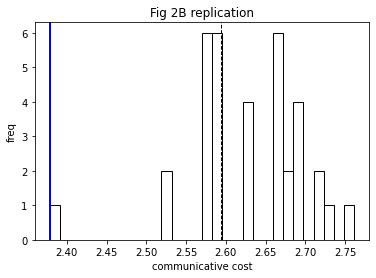

In [74]:
# plotting

figure, axis = plt.subplots()

axis.hist(cc_matrix_all, bins=30, color = "white", ec="black")
axis.set_xlabel("communicative cost")
axis.set_ylabel("freq")  
axis.set_title("Fig 2B replication")

plt.axvline(cc_matrix_nonchained, color='b', linewidth=2)
plt.axvline(cc_matrix_chained, color='k', linestyle='--', linewidth=1)

# Simulation (Yang's Chaining) and Plotting

### English

English survey naming data, EN Zipf need probability

survey v1

In [75]:
# cost for English survey naming 1 using zipf need prob info
l = create_listener_distribs(modal_name_naming, "cat_en_ours1", sim)
# display(l)
cc_en_survey1_zipf = add_ldis_ucc_cost(modal_name_naming, "cat_en_ours1", l, need_prob, 'en_zipf')
cc_en_survey1_zipf

4.7258245744515115

In [96]:
cc_en_ysmu_survey1_zipf = []

for _ in range(50000):
    naming_en_ysdf = chaining_yang(sim, cat_freq_en_ours1)
    l = create_listener_distribs(naming_en_ysdf, "cat", sim)
    cc_en_ysmu_survey1_zipf.append(add_ldis_ucc_cost(naming_en_ysdf, "cat", l, need_prob, 'en_zipf'))


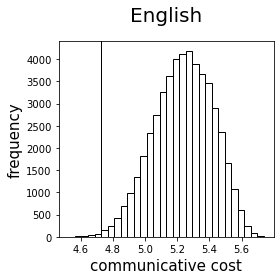

In [97]:
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_en_ysmu_survey1_zipf, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("English", fontsize=20, pad=20)
# axis.set_title("Simulation Result for English \n(Malt's naming data, Yang's chaining, ngram need probability)")

plt.tight_layout()
plt.axvline(cc_en_survey1_zipf, color='k', linewidth=1)
plt.savefig('cost_EN_ours_EN_zipf_50k.pdf')

In [179]:
np.count_nonzero(cc_en_ysmu_survey1_zipf < cc_en_survey1_zipf) / np.size(cc_en_ysmu_survey1_zipf)

0.00248

survey v2

In [663]:
# cost for English survey naming 2 using zipf need prob info
l = create_listener_distribs(modal_name_naming, "cat_en_ours2", sim)
# display(l)
cc_en_survey2_zipf = add_ldis_ucc_cost(modal_name_naming, "cat_en_ours2", l, need_prob, 'en_zipf')
cc_en_survey2_zipf

4.703297104469895

In [664]:
cc_en_ysmu_survey2_zipf = []

for _ in range(1000):
    naming_en_ysdf = chaining_yang(sim, cat_freq_en_ours2)
    l = create_listener_distribs(naming_en_ysdf, "cat", sim)
    cc_en_ysmu_survey2_zipf.append(add_ldis_ucc_cost(naming_en_ysdf, "cat", l, need_prob, 'en_zipf'))


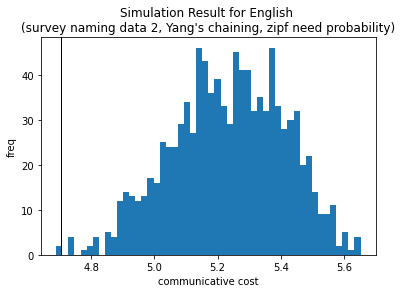

In [665]:
figure, axis = plt.subplots()

axis.hist(cc_en_ysmu_survey2_zipf, bins = 50)
axis.set_xlabel("communicative cost")
axis.set_ylabel("freq")  
axis.set_title("Simulation Result for English \n(survey naming data 2, Yang's chaining, zipf need probability)")

plt.axvline(cc_en_survey2_zipf, color='k', linewidth=1)

English survey naming data, **CH** Zipf need probability

survey v1

In [101]:
# cost for English survey naming 1 using CH zipf need prob info
l = create_listener_distribs(modal_name_naming, "cat_en_ours1", sim)
# display(l)
cc_en_survey1_chzipf = add_ldis_ucc_cost(modal_name_naming, "cat_en_ours1", l, need_prob, 'ch_zipf')
cc_en_survey1_chzipf

4.2597469783555715

In [99]:
cc_en_ysmu_survey1_chzipf = []

for _ in range(50000):
    naming_en_ysdf = chaining_yang(sim, cat_freq_en_ours1)
    l = create_listener_distribs(naming_en_ysdf, "cat", sim)
    cc_en_ysmu_survey1_chzipf.append(add_ldis_ucc_cost(naming_en_ysdf, "cat", l, need_prob, 'ch_zipf'))


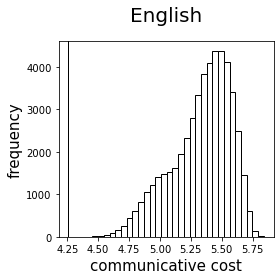

In [102]:
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_en_ysmu_survey1_chzipf, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("English", fontsize=20, pad=20)
# axis.set_title("Simulation Result for English \n(Malt's naming data, Yang's chaining, ngram need probability)")

plt.tight_layout()
plt.axvline(cc_en_survey1_chzipf, color='k', linewidth=1)
plt.savefig('cost_EN_ours_CH_zipf_50k.pdf')

In [183]:
np.count_nonzero(cc_en_ysmu_survey1_chzipf < cc_en_survey1_chzipf) / np.size(cc_en_ysmu_survey1_chzipf)

0.0

survey v2

In [71]:
# cost for English survey naming 2 using CH zipf need prob info
l = create_listener_distribs(modal_name_naming, "cat_en_ours2", sim)
# display(l)
cc_en_survey2_chzipf = add_ldis_ucc_cost(modal_name_naming, "cat_en_ours2", l, need_prob, 'ch_zipf')
cc_en_survey2_chzipf

4.246702507251091

In [677]:
cc_en_ysmu_survey2_chzipf = []

for _ in range(1000):
    naming_en_ysdf = chaining_yang(sim, cat_freq_en_ours2)
    l = create_listener_distribs(naming_en_ysdf, "cat", sim)
    cc_en_ysmu_survey2_chzipf.append(add_ldis_ucc_cost(naming_en_ysdf, "cat", l, need_prob, 'ch_zipf'))


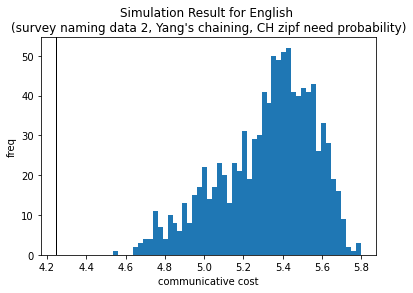

In [679]:
figure, axis = plt.subplots()

axis.hist(cc_en_ysmu_survey2_chzipf, bins = 50)
axis.set_xlabel("communicative cost")
axis.set_ylabel("freq")  
axis.set_title("Simulation Result for English \n(survey naming data 2, Yang's chaining, CH zipf need probability)")

plt.axvline(cc_en_survey2_chzipf, color='k', linewidth=1)

English Malt's naming data, En Ngram 1999 need probability

In [39]:
# cost for English Malt's naming using ngram need prob info
l = create_listener_distribs(modal_name_naming, "cat_en_malt", sim)
# display(l)
cc_en_malt_ngram = add_ldis_ucc_cost(modal_name_naming, "cat_en_malt", l, need_prob, 'en_ngram_1999_undivided')
cc_en_malt_ngram

4.9403898674400475

In [68]:
cc_en_ysmu_malt_ngram = []

for _ in range(50000):
    naming_en_ysdf = chaining_yang(sim, cat_freq_en_malt)
    l = create_listener_distribs(naming_en_ysdf, "cat", sim)
    cc_en_ysmu_malt_ngram.append(add_ldis_ucc_cost(naming_en_ysdf, "cat", l, need_prob, 'en_ngram_1999_undivided'))


In [99]:
%store cc_en_ysmu_malt_ngram
%store cc_en_malt_ngram

Stored 'cc_en_ysmu_malt_ngram' (list)
Stored 'cc_en_malt_ngram' (float64)


In [77]:
%store -r cc_en_ysmu_malt_ngram
%store -r cc_en_malt_ngram

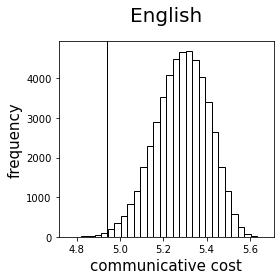

In [72]:
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_en_ysmu_malt_ngram, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("English", fontsize=20, pad=20)
# axis.set_title("Simulation Result for English \n(Malt's naming data, Yang's chaining, ngram need probability)")

plt.tight_layout()
plt.axvline(cc_en_malt_ngram, color='k', linewidth=1)
plt.savefig('cost_EN_Malt_EN_Ngram_1999_50k.pdf')

In [6]:
np.count_nonzero(cc_en_ysmu_malt_ngram <= cc_en_malt_ngram) / np.size(cc_en_ysmu_malt_ngram)

0.00354

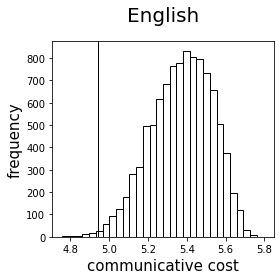

In [76]:
## divided


# cost for English Malt's naming using ngram need prob info 1999 divided
l = create_listener_distribs(modal_name_naming, "cat_en_malt", sim)
# display(l)
cc_en_malt_ngram_divided = add_ldis_ucc_cost(modal_name_naming, "cat_en_malt", l, need_prob, 'en_ngram_1999_divided')
cc_en_malt_ngram_divided


cc_en_ysmu_malt_ngram_divided = []

for _ in range(10000):
    naming_en_ysdf = chaining_yang(sim, cat_freq_en_malt)
    l = create_listener_distribs(naming_en_ysdf, "cat", sim)
    cc_en_ysmu_malt_ngram_divided.append(add_ldis_ucc_cost(naming_en_ysdf, "cat", l, need_prob, 'en_ngram_1999_divided'))

    
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_en_ysmu_malt_ngram_divided, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("English", fontsize=20, pad=20)
# axis.set_title("Simulation Result for English \n(Malt's naming data, Yang's chaining, ngram need probability)")

plt.tight_layout()
plt.axvline(cc_en_malt_ngram, color='k', linewidth=1)
plt.savefig('cost_EN_Malt_EN_Ngram_1999_divided_50k.pdf')

### Chinese

Chinese survey naming, **En** zipf need probability

In [109]:
# cost for Chinese survey naming using EN zipf need prob info
l = create_listener_distribs(modal_name_naming, "cat_ch_ours", sim)
# display(l)
cc_ch_survey_enzipf = add_ldis_ucc_cost(modal_name_naming, "cat_ch_ours", l, need_prob, 'en_zipf')
cc_ch_survey_enzipf

5.267601338389932

In [110]:
cc_ch_ysmu_survey_enzipf = []

for _ in range(50000):
    naming_ch_ysdf = chaining_yang(sim, cat_freq_ch_ours)
    l = create_listener_distribs(naming_ch_ysdf, "cat", sim)
    cc_ch_ysmu_survey_enzipf.append(add_ldis_ucc_cost(naming_ch_ysdf, "cat", l, need_prob, 'en_zipf'))


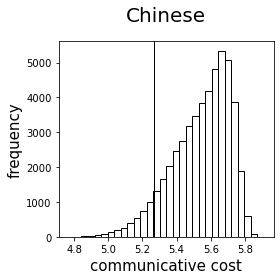

In [111]:
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_ch_ysmu_survey_enzipf, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("Chinese", fontsize=20, pad=20)
# axis.set_title("Simulation Result for Chinese \n(survey naming data, Yang's chaining, EN zipf need prob)")

plt.tight_layout()
plt.axvline(cc_ch_survey_enzipf, color='k', linewidth=1)
plt.savefig('cost_CH_ours_EN_zipf_50k.pdf')

In [187]:
np.count_nonzero(cc_ch_ysmu_survey_enzipf < cc_ch_survey_enzipf) / np.size(cc_ch_ysmu_survey_enzipf)

0.07242

Chinese survey naming, Ch zipf need probability

In [112]:
# cost for Chinese survey naming using CH zipf need prob info
l = create_listener_distribs(modal_name_naming, "cat_ch_ours", sim)
# display(l)
cc_ch_survey_zipf = add_ldis_ucc_cost(modal_name_naming, "cat_ch_ours", l, need_prob, 'ch_zipf')
cc_ch_survey_zipf

5.007830171236951

In [113]:
cc_ch_ysmu_survey_zipf = []

for _ in range(50000):
    naming_ch_ysdf = chaining_yang(sim, cat_freq_ch_ours)
    l = create_listener_distribs(naming_ch_ysdf, "cat", sim)
    cc_ch_ysmu_survey_zipf.append(add_ldis_ucc_cost(naming_ch_ysdf, "cat", l, need_prob, 'ch_zipf'))


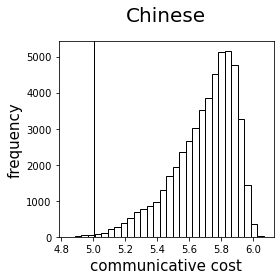

In [114]:
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_ch_ysmu_survey_zipf, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("Chinese", fontsize=20, pad=20)
# axis.set_title("Simulation Result for Chinese \n(survey naming data, Yang's chaining, CH zipf need prob)")

plt.tight_layout()
plt.axvline(cc_ch_survey_zipf, color='k', linewidth=1)
plt.savefig('cost_CH_ours_CH_zipf_50k.pdf')

In [188]:
np.count_nonzero(cc_ch_ysmu_survey_zipf < cc_ch_survey_zipf) / np.size(cc_ch_ysmu_survey_zipf)

0.00212

Chinese Malt's naming, **En** Ngram need probability 1999

In [78]:
# cost for Chinese Malt's naming using en need prob
l = create_listener_distribs(modal_name_naming, "cat_ch_malt", sim)
# display(l)
cc_ch_malt_ngram = add_ldis_ucc_cost(modal_name_naming, "cat_ch_malt", l, need_prob, 'en_ngram_1999_undivided')
cc_ch_malt_ngram

5.336080487854696

In [81]:
cc_ch_ysmu_malt_ngram = []

for _ in range(50000):
    naming_ch_ysdf = chaining_yang(sim, cat_freq_ch_malt)
    l = create_listener_distribs(naming_ch_ysdf, "cat", sim)
    cc_ch_ysmu_malt_ngram.append(add_ldis_ucc_cost(naming_ch_ysdf, "cat", l, need_prob, 'en_ngram_1999_undivided'))


In [82]:
%store cc_ch_ysmu_malt_ngram
%store cc_ch_malt_ngram

Stored 'cc_ch_ysmu_malt_ngram' (list)
Stored 'cc_ch_malt_ngram' (float64)


In [83]:
%store -r cc_ch_ysmu_malt_ngram
%store -r cc_ch_malt_ngram

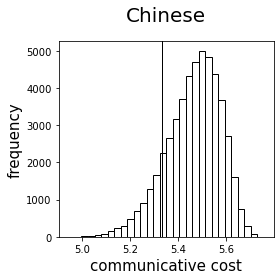

In [84]:
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_ch_ysmu_malt_ngram, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("Chinese", fontsize=20, pad=20)
# axis.set_title("Simulation Result for Chinese \n(Malt's naming, Yang's chaining, En Ngram need probability)")

plt.tight_layout()
plt.axvline(cc_ch_malt_ngram, color='k', linewidth=1)
plt.savefig('cost_CH_Malt_EN_Ngram_1999_50k.pdf')

In [85]:
np.count_nonzero(cc_ch_ysmu_malt_ngram <= cc_ch_malt_ngram) / np.size(cc_ch_ysmu_malt_ngram)

0.1295

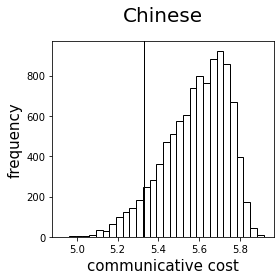

In [77]:
## divided


# cost for Chinese Malt's naming using en need prob info 1999 divided
l = create_listener_distribs(modal_name_naming, "cat_ch_malt", sim)
# display(l)
cc_ch_malt_ngram_divided = add_ldis_ucc_cost(modal_name_naming, "cat_ch_malt", l, need_prob, 'en_ngram_1999_divided')
cc_ch_malt_ngram_divided


cc_ch_ysmu_malt_ngram_divided = []

for _ in range(10000):
    naming_ch_ysdf = chaining_yang(sim, cat_freq_ch_malt)
    l = create_listener_distribs(naming_ch_ysdf, "cat", sim)
    cc_ch_ysmu_malt_ngram_divided.append(add_ldis_ucc_cost(naming_ch_ysdf, "cat", l, need_prob, 'en_ngram_1999_divided'))

    
figure, axis = plt.subplots(figsize=(4,4))

axis.hist(cc_ch_ysmu_malt_ngram_divided, bins = 30, color = "white", ec="black")
axis.set_xlabel("communicative cost", fontsize=15)
axis.set_ylabel("frequency", fontsize=15)  
axis.set_title("Chinese", fontsize=20, pad=20)
# axis.set_title("Simulation Result for Chinese \n(Malt's naming, Yang's chaining, En Ngram need probability)")

plt.tight_layout()
plt.axvline(cc_ch_malt_ngram, color='k', linewidth=1)
plt.savefig('cost_CH_Malt_EN_Ngram_1999_divided_50k.pdf')
